In [2]:
import pandas as pd

# Read the CSV file into a DataFrame
usd_exchange_rate = pd.read_csv("EXCHANGE_RATES_2010-PRESENT.csv")

# Filter rows where the "Currency" column is equal to "USD"
usd_rows = usd_exchange_rate[usd_exchange_rate['Currency'] == 'USD']

# Extract year and month from the 'Date' column
usd_rows['Year'] = pd.to_datetime(usd_rows['Date']).dt.year
usd_rows['Month'] = pd.to_datetime(usd_rows['Date']).dt.month

# Group by 'Year' and 'Month' and calculate the median of 'Buy Rate'
median_df = usd_rows.groupby(['Year', 'Month'])['Buy Rate'].median().reset_index()

print(median_df)

     Year  Month   Buy Rate
0    2010      5  112.91915
1    2010      6  112.90460
2    2010      7  113.57550
3    2010      8  111.78065
4    2010      9  111.70580
..    ...    ...        ...
146  2023      6  297.41325
147  2023      7  314.12565
148  2023      8  315.05740
149  2023      9  317.54360
150  2023     10  318.22660

[151 rows x 3 columns]


/var/folders/kp/bgyrqb3s3n19yxcx2cyqppwh0000gn/T/ipykernel_18373/2473446563.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usd_rows['Year'] = pd.to_datetime(usd_rows['Date']).dt.year
/var/folders/kp/bgyrqb3s3n19yxcx2cyqppwh0000gn/T/ipykernel_18373/2473446563.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usd_rows['Month'] = pd.to_datetime(usd_rows['Date']).dt.month


In [6]:
# Find the starting and ending year and month
start_year = median_df['Year'].iloc[0]
start_month = median_df['Month'].iloc[0]
end_year = median_df['Year'].iloc[-1]
end_month = median_df['Month'].iloc[-1]

# Create a range of years and months from the starting to ending
date_range = pd.date_range(start=f"{start_year}-{start_month}", end=f"{end_year}-{end_month}", freq='M')

# Create a new DataFrame with 'Year' and 'Month' columns from the date_range
new_rows_df = pd.DataFrame({'Year': date_range.year, 'Month': date_range.month})

# Merge the new rows DataFrame with the existing DataFrame to get the closest 'Buy Rate'
result_df = new_rows_df.merge(median_df, on=['Year', 'Month'], how='left')

rows_with_nan = result_df[result_df['Buy Rate'].isna()]

# Define a dictionary to map 'Year' and 'Month' to the corresponding value
fill_values = {
    (2011, 9): 110.062,
    (2011, 10): 110.096,
    (2012, 3): 128.100,
    (2012, 4): 129.210,
    (2012, 5): 131.110,
    (2012, 7): 131.700,
    (2012, 8): 132.300,
    (2012, 12): 127.500,
    (2013, 2): 127.450,   
    (2013, 3): 126.700,   
    (2013, 5): 126.450,          
}

# Fill NaN values in the 'Buy Rate' column based on the 'Year' and 'Month' combination
result_df['Buy Rate'] = result_df.apply(lambda row: fill_values.get((row['Year'], row['Month']), row['Buy Rate']), axis=1)

print(result_df)

     Year  Month   Buy Rate
0    2010      5  112.91915
1    2010      6  112.90460
2    2010      7  113.57550
3    2010      8  111.78065
4    2010      9  111.70580
..    ...    ...        ...
156  2023      5  302.42570
157  2023      6  297.41325
158  2023      7  314.12565
159  2023      8  315.05740
160  2023      9  317.54360

[161 rows x 3 columns]


In [8]:

# Read the new CSV file with date and usd_rate columns
new_data = pd.read_csv('./usd_rates.csv')

# Convert the date column to a datetime object and extract year and month
new_data['Date'] = pd.to_datetime(new_data['date'], format='%m/%d/%y')
new_data['Year'] = new_data['Date'].dt.year
new_data['Month'] = new_data['Date'].dt.month

# Create a new DataFrame with 'Year', 'Month', and 'Buy Rate' columns
new_df = new_data[['Year', 'Month', 'usd_rate']].rename(columns={'usd_rate': 'Buy Rate'})

# Merge the new DataFrame with the existing DataFrame
merged_usd_rates_df = pd.concat([result_df, new_df], ignore_index=True)

# Sort the merged DataFrame by 'Year' and 'Month'
merged_usd_rates_df = merged_usd_rates_df.sort_values(by=['Year', 'Month'])

print(merged_usd_rates_df)

     Year  Month   Buy Rate
445  1986      8   28.23000
444  1986      9   28.36000
443  1986     10   28.47000
442  1986     11   28.51000
441  1986     12   28.53000
..    ...    ...        ...
156  2023      5  302.42570
157  2023      6  297.41325
158  2023      7  314.12565
159  2023      8  315.05740
160  2023      9  317.54360

[446 rows x 3 columns]


In [9]:
import pandas as pd
import os

# Initialize an empty list to store the dataframes
dataframes = []

# Specify the directory containing the CSV files
directory_path = "../../CSE_DATA/SHARE_CHANGE/"

filenames = [os.path.join(directory_path, file) for file in os.listdir(directory_path) if file.endswith('.csv')]

# Initialize an empty DataFrame to store the data
data = pd.DataFrame()

# Loop through the CSV files and read them into DataFrames
for file in filenames:
    df = pd.read_csv(file)
    # Extract the label from the file name and remove the ".csv" extension
    label = os.path.basename(file).replace(".csv", "")
    # Add the label as a new column
    df['Label'] = label
    dataframes.append(df)

# Concatenate all DataFrames into a single DataFrame
combined_df = pd.concat(dataframes, ignore_index=True)

# Filter out data associated with the label 'SWAD.N0000'
combined_df = combined_df[combined_df['Label'] != 'SWAD.N0000']

# Convert 'Trade Date' from MM/DD/YY to DD/MM/YYYY format
combined_df['Trade Date'] = pd.to_datetime(combined_df['Trade Date'], format='%m/%d/%y').dt.strftime('%d/%m/%Y')

# Split 'Trade Date' into 'Day', 'Month', and 'Year' columns
combined_df[['Day', 'Month', 'Year']] = combined_df['Trade Date'].str.split('/', expand=True)


# Select the columns 'Label', 'Day', 'Month', 'Year', and 'Close (Rs.)'
selected_columns = ['Label', 'Day', 'Month', 'Year', 'Close (Rs.)']
result_df = combined_df[selected_columns]


# Group by 'Label', 'Year', and 'Month' and calculate the median
final_result = result_df.groupby(['Label', 'Year', 'Month'])['Close (Rs.)'].median().reset_index()


# Sort the DataFrame by 'Label' and the new date columns
final_result = final_result.sort_values(by=['Year', 'Month', 'Label'])

# Convert 'Year' and 'Month' columns to integers
final_result['Year'] = final_result['Year'].astype(int)
final_result['Month'] = final_result['Month'].astype(int)

print(final_result)

            Label  Year  Month  Close (Rs.)
19629   JKH.N0000  1986      8         0.00
35686   SUN.N0000  1990      3        12.50
16090  GREG.N0000  1990      4         0.50
32359  SELI.N0000  1991      1       550.00
33994  SHAL.N0000  1991      2       575.00
...           ...   ...    ...          ...
40074  VPEL.N0000  2023     10         6.80
40078  WAPO.N0000  2023     10        31.50
40388  WATA.N0000  2023     10        74.20
40419  WIND.N0000  2023     10        18.55
40423  YORK.N0000  2023     10       165.00

[40424 rows x 4 columns]


In [14]:
# Merge the DataFrames using a left join on 'Year' and 'Month'
merged_df = pd.merge(final_result, merged_usd_rates_df, on=['Year', 'Month'], how='left')


merged_df['Buy Rate'] = merged_df['Buy Rate'].fillna(323.787)
# Assuming you have the combined DataFrame named 'result_df'
merged_df.to_csv('final_usd_exchange_rate_vs_stock_values.csv', index=False)

print(merged_df)


            Label  Year  Month  Close (Rs.)  Buy Rate
0       JKH.N0000  1986      8         0.00    28.230
1       SUN.N0000  1990      3        12.50    40.020
2      GREG.N0000  1990      4         0.50    40.020
3      SELI.N0000  1991      1       550.00    40.400
4      SHAL.N0000  1991      2       575.00    40.720
...           ...   ...    ...          ...       ...
40419  VPEL.N0000  2023     10         6.80   323.787
40420  WAPO.N0000  2023     10        31.50   323.787
40421  WATA.N0000  2023     10        74.20   323.787
40422  WIND.N0000  2023     10        18.55   323.787
40423  YORK.N0000  2023     10       165.00   323.787

[40424 rows x 5 columns]


In [11]:
# Convert 'Year', 'Month', and 'Day' columns to strings in both DataFrames
result_df['Year'] = result_df['Year'].astype(str)
result_df['Month'] = result_df['Month'].astype(str)
result_df['Day'] = result_df['Day'].astype(str)

usd_exchange_rate['Year'] = usd_exchange_rate['Date'].dt.year.astype(str)
usd_exchange_rate['Month'] = usd_exchange_rate['Date'].dt.month.astype(str)
usd_exchange_rate['Day'] = usd_exchange_rate['Date'].dt.day.astype(str)

# Merge share_df with exchange_rate on Year, Month, and Day columns
merged_df = result_df.merge(usd_exchange_rate[['Day', 'Month', 'Year', 'Buy Rate', 'Sell Rate']], on=['Day', 'Month', 'Year'], how='left')

# Remove rows where both 'Buy Rate' and 'Sell Rate' are NaN
merged_df = merged_df.dropna(subset=['Buy Rate', 'Sell Rate'])

# Print or use merged_df
print(merged_df)


/var/folders/kp/bgyrqb3s3n19yxcx2cyqppwh0000gn/T/ipykernel_18373/3091322312.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_df['Year'] = result_df['Year'].astype(str)
/var/folders/kp/bgyrqb3s3n19yxcx2cyqppwh0000gn/T/ipykernel_18373/3091322312.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_df['Month'] = result_df['Month'].astype(str)
/var/folders/kp/bgyrqb3s3n19yxcx2cyqppwh0000gn/T/ipykernel_18373/3091322312.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

AttributeError: Can only use .dt accessor with datetimelike values

In [ ]:
# Save the filtered DataFrame to a CSV file
merged_df.to_csv('usd_vs_share_price_data.csv', index=False)

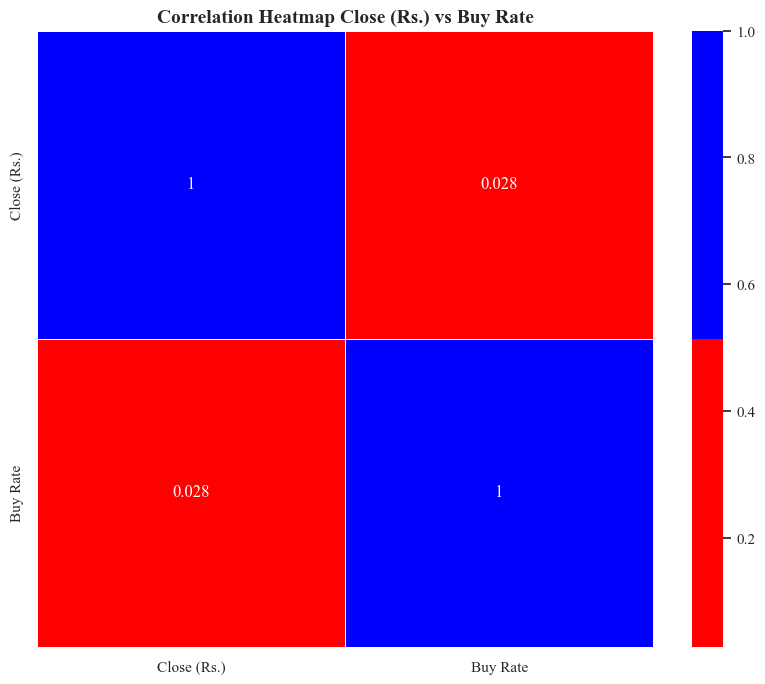

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Your DataFrame
data = pd.read_csv('./final_usd_exchange_rate_vs_stock_values.csv')

df = pd.DataFrame(data)

# Select the columns you want for the heatmap
columns = ['Close (Rs.)', 'Buy Rate']

# Create a correlation matrix
corr_matrix = df[columns].corr()

# Create custom color palette with "Close (Rs.)" in red and "Loan Rate" in green
colors = ['red', 'blue']
cmap = sns.color_palette(colors, as_cmap=True)

# Set the font style to Times New Roman
sns.set(style="white", font='Times New Roman')

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap=cmap, linewidths=0.5, square=True)
plt.title('Correlation Heatmap Close (Rs.) vs Buy Rate', fontweight='bold', fontsize=14)
plt.show()